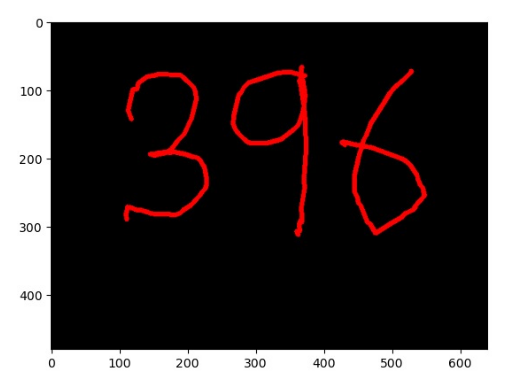

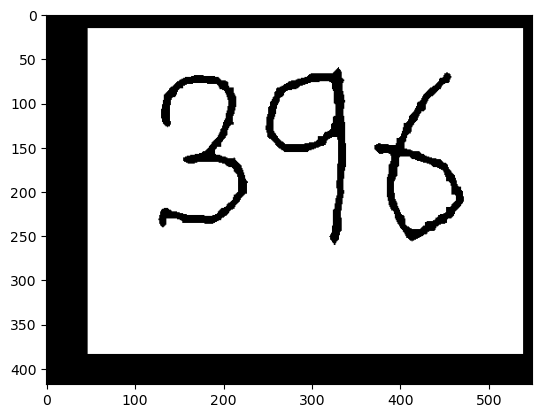

Number of contours detected: 4


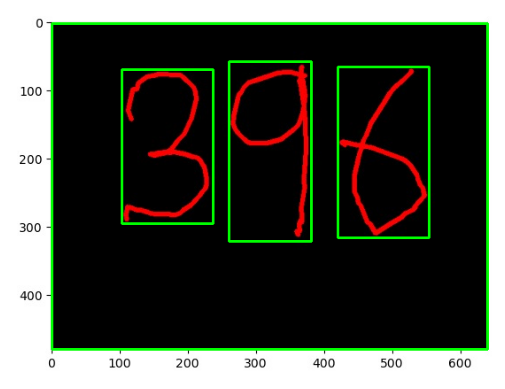

In [129]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image, convert it to grayscale, and blur it to remove noise
image = cv2.imread('images/img3.jpg')
# show the image on plt
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = cv2.GaussianBlur(gray, (7, 7), 0)

# Threshold the image
ret, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY_INV)

# Dilate the white portions
dilate = cv2.dilate(thresh, None, iterations=2)
# show the image on plt
plt.imshow(dilate, cmap='gray')

plt.show()


# Find contours in the image
contours, _ = cv2.findContours(dilate.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

orig = image.copy()
i = 0

for cnt in contours:
    # Check the area of contour; if it is very small, ignore it
    if cv2.contourArea(cnt) < 3900 or cv2.contourArea(cnt) > 0.8 * image.shape[0] * image.shape[1]:
        continue

    # Filtered contours are detected
    x, y, w, h = cv2.boundingRect(cnt)

    # Taking ROI of the contour
    roi = image[y-10:y+h+10, x-10:x+w+10]

    # Mark them on the image if you want
    cv2.rectangle(orig, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Save your contours or characters to segmented_images folder
    cv2.imwrite('segmented_images/' + str(i) + '.png', roi)
    i += 1

# Convert the BGR image to RGB before displaying
orig_rgb = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
num_contours = i
print("Number of contours detected: " + str(num_contours))

# Display the image with the detected contours using pyplot
plt.axis('off')
plt.imshow(orig_rgb)
plt.show()

In [130]:
# load model import tensorflow
from tensorflow.keras.models import load_model
model = load_model('model.h5')

In [147]:
def preprocess_image(img):
    
    #display the image
    # plt.imshow(img.squeeze(), cmap='gray')
    # plt.show()

    #add padiing to all the sides
    img = np.pad(img, ((40,40), (69,69)), 'constant', constant_values=(0,0))
    img = cv2.resize(img, (28, 28))
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
    img = cv2.GaussianBlur(img, (3,3), 0)
    # img = cv2.GaussianBlur(img, (3,3), 0)
   
    img = img.reshape(1, 28, 28, 1)  
    # plt.imshow(img.squeeze(), cmap='gray')
    # plt.show()
    return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted: 9


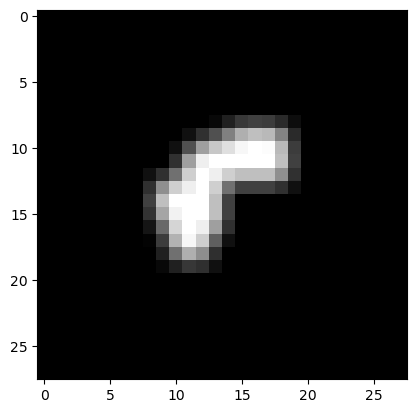




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted: 7


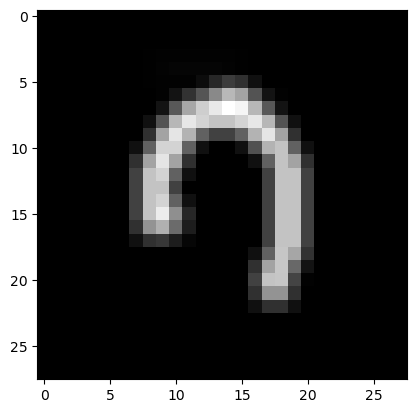




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted: 8


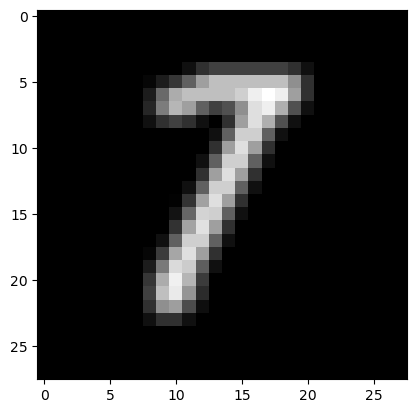




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted: 3


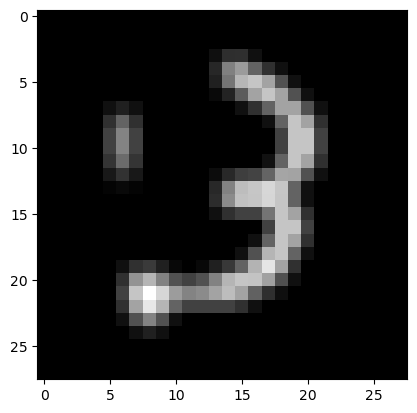

In [148]:

# load images and make predictions

folder_path = 'segmented_images/'
for imag in range(num_contours):
    img = cv2.imread(folder_path + str(imag) + '.png', cv2.IMREAD_GRAYSCALE)
    img = preprocess_image(img)
    pred = model.predict([img])
    print("Predicted: " + str(pred.argmax()))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.show()
    print("\n\n")

